<img src='Static_figs/LSASAF_NoName_Colour.png' align='right' width='25%'></img>

<div class="alert alert-block alert-success">
<b>PREREQUISITE </b></div>

It is expected for user to be familiar with Python. 

it is expected, that **MLST-ASv2** product data is downloaded from [LSA-SAF data server](https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/MLST-ASv2/NETCDF/2022/) in `NetCDF4` format for July and August of 2022 and save locally.

<hr>

# Comparison Between LSA-SAF MLST-ASv2, Air and Soil  Temperature Measurements

#### About 


LSA-SAF Land Surface Temperature - All Sky Version 2 product ([MLST-ASv2](https://landsaf.ipma.pt/en/data/products/land-surface-temperature-and-emissivity/)) is an estimate for the temperature of the ground surface produced using data from the MSG satellite. In meteorology, the measurement of air temperature at 2 m height in a [Stevenson screen](https://en.wikipedia.org/wiki/Stevenson_screen) (an instrument shelter) is traditionally used.

Land surface temperature (LST) is related to both air and soil temperature, but the exact relationship is rather complicated. In this notebook, we try to illustrate this relation, rather than precisely investigate it. We decided to use the LSA SAF MLST-ASv2 product instead of the LSA SAF Land Surface Temperature product (MLST) since LSA SAF MLST-ASv2 calculates LST estimates also in cloudy conditions.

Air temperature is measured at a limited number of in-situ meteorological stations. On the contrary, the satellite measurements conducted by the Meteosat Second Generation satellite (MSG) provide gridded data on a full disk.

The area covered by a single pixel typically does not have uniform temperature as the temperature is greatly affected by land cover, altitude, etc. Examples of heterogeneous pixels can be urbanized areas and geographically diverse areas (mountains, hills, different types of vegetation, etc.).

Knowing the exact relationship between air temperature and LST measurement from the satellite would have numerous useful applications. There are several methodologies to find the relationship between air temperature and LST. For example, there is both a seasonal dependency ([Noserikia et all, 2023](https://doi.org/10.1016/j.scitotenv.2023.167306)) and a major land cover dependency ([do Nascimento et all, 2022](https://doi.org/10.3390/atmos13030491)).

In this notebook, we aim to demonstrate the differences between LST from MLST-ASv2, air temperature at 2 m and 0.05 m, and soil temperatures at depths of 0.05 m and 0.20 m.

#### How to access the data

Data can be accessed from [LSA SAF data server](https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/MLST-ASv2/NETCDF/2022/), prior registration is needed.

#### Basic facts on the LSA SAF MLST-ASv2 

 > **Spatial resolution**: 3km at nadir 
 >
 > **Spatial coverage**: MSG disk 
 >
 > **Time steps**: 30 min  
 >
 > **Data availability**: from 2004

#### Module outline:
* [1 - Preparing the data and calculations](#First)
* [2 - Plotting the measurements](#Second)
* [3 - Comparison](#Third)
* [4 - Conclusion](#Fourth)

#### Load required libraries

In [ ]:
import matplotlib.pyplot as plt     #a library tht provides plotting capability
import datetime as dt               #a library that allows us to work with dates and times
import xarray as xr                 #a library that helps us work efficiently with multi-dimensional arrays with a new name xr
import numpy as np                  #a library that lets us work with arrays
import pandas as pd                 #a library for time series analysis

### <a id='First'></a>1. Preparing the data and calculations

Data for air and soil temperature were measured at the Slovenian Environmental Agency (ARSO) in the summer of 2022. They were obtained from the automated meteorological weather station in Ljubljana, located at 46.0655° N, 14.5124° E at an elevation of 299 m. Measurements are recorded every 10 min.

In-situ meteorological station in Ljubljana is located within an urbanized area on an open grass-covered area with dimensions 50 m x 50 m and is surrounded by urbanized areas.

Measurements of air and soil temperature are available as `.csv` files with the columns `time` and `temperature`. The time zone of the data is UTC, while the temperature is in ˚C. 
First, the names of datasets and files are defined and a `globals()` method is used to iterate over them.

In [2]:
# Dataset names and filenames need to be in the same order

# Specify the pandas datasets names
dataset_names=[
                "AIR_200",
                "AIR_005",
                "SOIL_020",
                "SOIL_005"
               ]

# Specify names of the data files
file_names=[
                "AIR_2.00m.csv",
                "AIR_0.05m.csv",
                "SOIL_0.20m.csv",
                "SOIL_0.05m.csv"
               ]

# Specidy legend entries on plot
labels=[
            "Air height 2.00 m",
            "Air height 0.05 m",
            "Soil depth 0.20 m",
            "Soil depth 0.05 m"
            ]

# Specify plot colors
colors=[
        "darkblue",
        "deepskyblue",
        "k",
        "saddlebrown"
            ]

# Specify plot linestyles
linestyles=[
            "dashed",
            "dashdot",
            "dashdot",
            "dashed"
            ]

Next, all measurement files are loaded into the dataset and the first column is translated from `string` to `datetime` object.

In [3]:
# Loop over all measurements
for i in range(len(dataset_names)):
    globals()[dataset_names[i]]=pd.read_csv(
                                        file_names[i],
                                        sep=",",
                                        )

    # Translate 1st column from string to dDateTime object
    globals()[dataset_names[i]]["time"]=pd.to_datetime(
                                                    globals()[dataset_names[i]]["time"],
                                                    errors="coerce"
                                                    )
    
    
    # Show the dataset to visually investigate the data
    print(globals()[dataset_names[i]])  


                    time  temperature
0    2022-06-30 22:50:00         23.6
1    2022-06-30 23:00:00         23.4
2    2022-06-30 23:10:00         23.2
3    2022-06-30 23:20:00         22.8
4    2022-06-30 23:30:00         22.6
...                  ...          ...
8925 2022-08-31 22:20:00         17.0
8926 2022-08-31 22:30:00         16.9
8927 2022-08-31 22:40:00         16.9
8928 2022-08-31 22:50:00         16.8
8929 2022-08-31 23:00:00         16.8

[8930 rows x 2 columns]
                    time  temperature
0    2022-06-30 22:50:00         20.5
1    2022-06-30 23:00:00         20.2
2    2022-06-30 23:10:00         17.9
3    2022-06-30 23:20:00         18.1
4    2022-06-30 23:30:00         16.8
...                  ...          ...
8925 2022-08-31 22:20:00         16.5
8926 2022-08-31 22:30:00         16.4
8927 2022-08-31 22:40:00         16.5
8928 2022-08-31 22:50:00         16.4
8929 2022-08-31 23:00:00         16.4

[8930 rows x 2 columns]
                    time  temperature


Before loading the MLST-ASv2 data we need to define the dates and area of interest. In this case, we are extracting only a single pixel.

In [4]:
# Start and end dates are defined
start_date=dt.datetime(2022, 7, 1)
end_date=dt.datetime(2022, 8, 31)

# List of DateTime objects for measurements is defined
date_range=pd.date_range(start_date,end_date-dt.timedelta(minutes=30),freq='30T')

# Location is defined
Ljubljana_lat=46.0655
Ljubljana_lon=14.5124


In the next step, we will extract only the pixel values, that are nearest to the location of the interest, by using `xmethod=" nearest"`, since the location might not be perfectly aligned with a pixel center. Since there might be missing data only the valid `datetime` objects will be appended to the list of dates.

We then load the data from the NetCDF4 files. The slow load is used when the `xarray` dataset is first defined and only the values matching pre-defined coordinates are actually loaded into memory.

In [5]:
# Create an empty list
LSA_SAF_temperature=np.empty(0)
LSA_SAF_date=[]

# Loop over the dates of interest
for i, time in enumerate(date_range):        
        try:
                # Define dataset
                LSA_SAF_ds=xr.open_dataset("Data/NETCDF4_LSASAF_MSG_MLST-ASv2_MSG-Disk_"
                                        +str("{:02d}".format(date_range[i].year))
                                        +str("{:02d}".format(date_range[i].month))
                                        +str("{:02d}".format(date_range[i].day))
                                        +str("{:02d}".format(date_range[i].hour))
                                        +str("{:02d}".format(date_range[i].minute))
                                        +".nc")
               
                # Load and append the desired data point
                LSA_SAF_temperature=np.append(
                                        LSA_SAF_temperature,
                                        LSA_SAF_ds.sel(lat=[Ljubljana_lat], lon=[Ljubljana_lon], method="nearest")['MLST-AS'].load().values[0]
                                         )     
                # Append the measurement time
                LSA_SAF_date.append(date_range[i])

                # Close dataset to free the memorry
                LSA_SAF_ds.close()

        # In case loading was not succesful
        except:
                print("Missing value: "+str(date_range[i]))

Missing value: 2022-07-25 10:30:00
Missing value: 2022-07-25 11:00:00
Missing value: 2022-08-10 12:30:00
Missing value: 2022-08-13 16:00:00


### <a id='Second'></a>2. Plotting the measurements

In this step, we will plot all the measurements. We can limit the range on the x-axis using the `xlim` to plot only the measurements for a certain time period, in this case, one week.

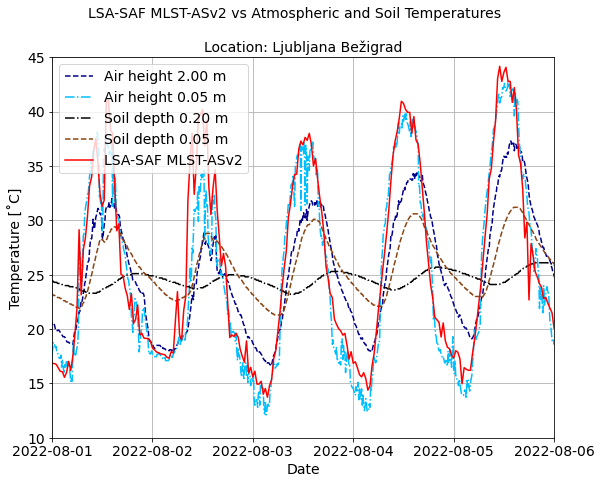

In [6]:
# Font and figure sizes are defined
fontsize=14
plt.figure(figsize=(9, 7))

# Measurements of air and soil temperatures are plotted
for i in range(len(dataset_names)):
    plt.plot(globals()[dataset_names[i]]["time"].to_numpy(),
             globals()[dataset_names[i]]["temperature"].to_numpy(),
             label=labels[i],
             color=colors[i],
             linestyle=linestyles[i]
             )

# LSA-SAF MLST-ASv2 measurements are plotted
plt.plot(LSA_SAF_date,
         LSA_SAF_temperature,
         label="LSA-SAF MLST-ASv2",
         color="red"
         )

# Set plot limits
plt.xlim(pd.Timestamp('2022-08-01'), pd.Timestamp('2022-08-06'))
plt.ylim(10,45)

#Set grid and ticks
plt.grid()
plt.xlabel('Date', fontdict# Set plot limits
# Add legend
plt.legend(fontsize=fontsize)
plt.show()

### <a id='Third'></a>3. Comparison

From the figure, we are able to observe that LST, air and soil temperature are correlated although there might be some phase shifts. Soil temperature is shifted in time behind LST and air temperature and at the same time exhibits a smaller amplitude than either of them.

### <a id='Fourth'></a>4. Conclusion

With this notebook, we demonstrate the differences among LST from MLST-ASv2, air temperature at 2 m and 0.05 m, and soil temperatures at depths of 0.05 m and 0.20 m. Loading and exploration of MLST-ASv2 and in-situ measurements is accomplished with Python. Presented are time series of temperature from different sources.

#### References:

* Nadbath M. (2008). Meteorološka postaja Ljubljana Bežigrad, Naše Okolje, special edition. [https://meteo.arso.gov.si/uploads/probase/www/climate/text/sl/stations/ljubljana-bezigrad.pdf](https://meteo.arso.gov.si/uploads/probase/www/climate/text/sl/stations/ljubljana-bezigrad.pdf). Accessed: 19.12.2023.    

* do Nascimento A.C.L., Galvani, E., Gobo, J.P.A., et all. (2022) Comparison between Air Temperature and Land Surface Temperature for the City of São Paulo, Brazil. Atmosphere. [https://doi.org/10.3390/atmos13030491](https://doi.org/10.3390/atmos13030491). Accessed: 19.12.2023.

* Naserikia M., Hart M., Nazarian N., et all. (2023) Land surface and air temperature dynamics: The role of urban form and seasonality. Sci. of the Tot. Environment. [https://doi.org/10.1016/j.scitotenv.2023.167306](https://doi.org/10.1016/j.scitotenv.2023.167306) Accessed: 19.12.2023.